## **Intermediate Task 02**

Important Libraries to be used

In [67]:
import re
import string
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

### **Connecting Dataset from drive:**

If you don't have the access then upload it from kaggle: https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction

NOTE: Download this dataset and if you are running this code then make sure to upload it in the drive and update the path defined in the variable ***file_path***

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/fake_job_postings.csv'
df = pd.read_csv(file_path)

In [70]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


### **Cleaning and Processing the dataset:**

In [71]:
df.shape

(17880, 18)

In [72]:
df.isnull().sum()

,0
job_id,0
title,0
location,346
department,11547
salary_range,15012
company_profile,3308
description,1
requirements,2696
benefits,7212
telecommuting,0


In [73]:
# dropping columns that have large number of null values
columns=['job_id','telecommuting','has_company_logo','has_questions','salary_range','employment_type']
for col in columns:
  df.drop(col,axis=1,inplace=True)

df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [74]:
# handling other missing value like filling nan with empty space
df.fillna('',inplace=True)

### **Visualizing some features:**

In [75]:
# comparing job posts which are fraudulent and non-fraudulent
df['fraudulent'].value_counts()

,count
fraudulent,
0,17014
1,866


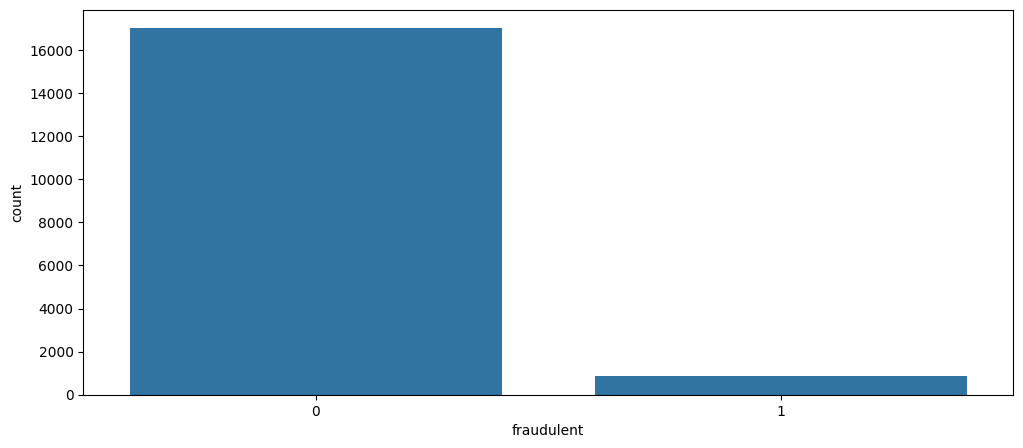

In [76]:
# we can also visualize it
plt.figure(figsize=(12,5))
sns.countplot(x='fraudulent',data=df)
plt.show()

In [77]:
# comparing what experience level each job post requires
df['required_experience'].value_counts()

,count
required_experience,
,7050
Mid-Senior level,3809
Entry level,2697
Associate,2297
Not Applicable,1116
Director,389
Internship,381
Executive,141


In [78]:
# since the required_experience column has some empty values, thus dropping those values
df = df[df['required_experience'].str.strip() != '']

In [79]:
df.shape

(10830, 12)

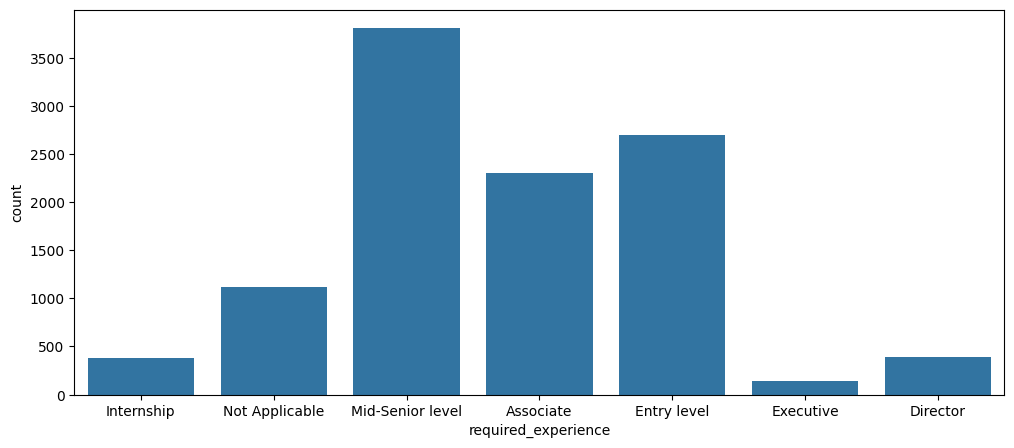

In [80]:
# we can also visualize it like previous
plt.figure(figsize=(12,5))
sns.countplot(x='required_experience',data=df)
plt.show()

In [81]:
# comparing no. of jobs posted based on countries and for that the column location having country,state and city but we will keep only country
# so we will split the location column by ',' to fetch the 0th index of it
df['Country'] = df.location.apply(lambda x: x.split(',')[0])
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,Country
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US
6,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,Mid-Senior level,Master's Degree,Online Media,Management,0,DE


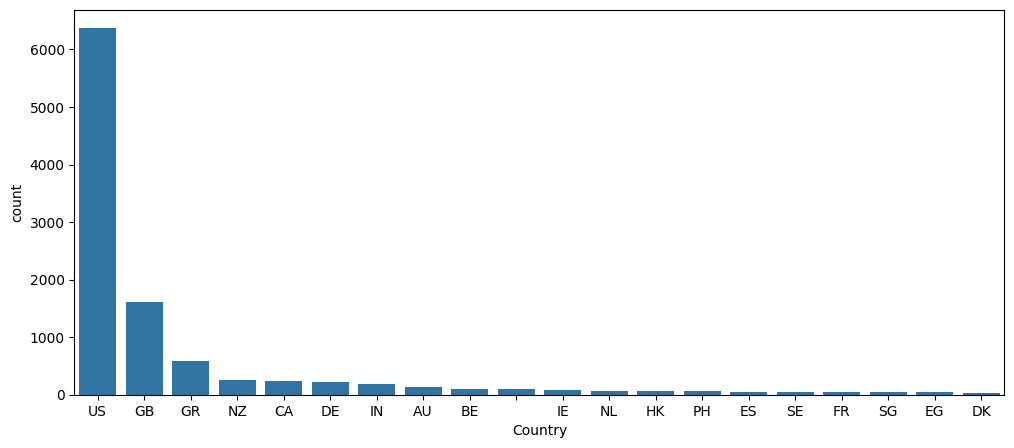

In [82]:
# visualizing the top 20 countries for the job post like previous ones
plt.figure(figsize=(12,5))
sns.countplot(x='Country',data=df,order=df['Country'].value_counts().iloc[:20].index)
plt.show()

In [83]:
# comparing and visualizing job post based on education level as well
df['required_education'].value_counts()

,count
required_education,
Bachelor's Degree,4212
,2319
High School or equivalent,1972
Unspecified,1327
Master's Degree,332
Associate Degree,250
Certification,146
Some College Coursework Completed,100
Professional,67


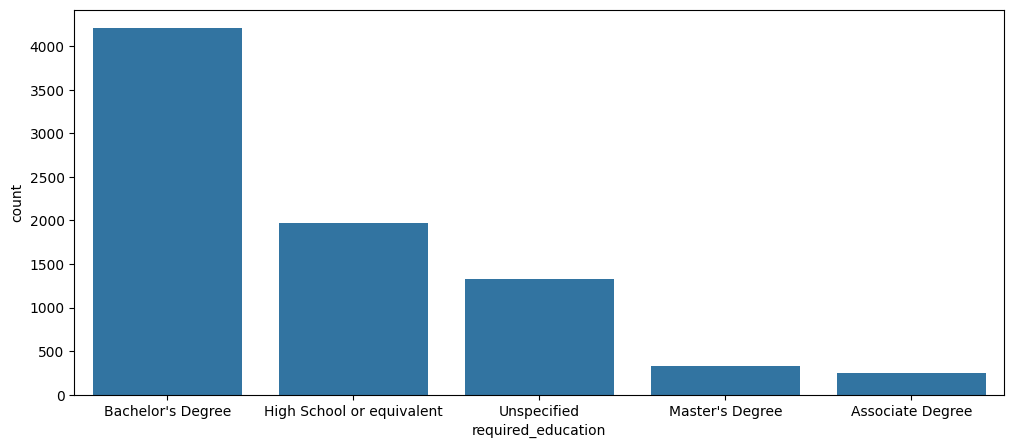

In [84]:
df = df[df['required_education'].str.strip() != '']
plt.figure(figsize=(12,5))
sns.countplot(x='required_education',data=df,order=df['required_education'].value_counts().iloc[:5].index)
plt.show()

In [85]:
# checking for titles of the jobs posted which were not fraudulent
df[df['fraudulent']==0]['title'].value_counts()[:10]

,count
title,
Graduates: English Teacher Abroad (Conversational),144
Customer Service Associate,142
Customer Service Associate - Part Time,76
Account Manager,43
Customer Service Team Lead,40
Customer Service Associate,40
English Teacher Abroad (Conversational),39
Sales Representative,33
Account Executive,32


In [86]:
# and for titles which had posts to be fraudulent
df[df['fraudulent']==1]['title'].value_counts()[:10]

,count
title,
Customer Service Representative,17
"Account Sales Managers $80-$130,000/yr",9
Payroll Clerk,9
Network Marketing,9
Administrative Assistant,8
Payroll Data Entry Clerk Position - Earn $100-$200 Daily,6
"Agency Sales Managers $150-$175,000/yr",6
Data Entry,5
Call Center Representative I,4


In [87]:
df.shape

(8511, 13)

In [88]:
# combining the important columns from the dataset and deleting the rest of the columns
df['combined'] = df['title'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits']
df.drop(['title','company_profile','description','requirements','benefits','location','department','required_experience','required_education','industry','function','Country'],axis=1,inplace=True)
df.head()

,fraudulent,combined
3,0,Account Executive - Washington DC Our passion ...
4,0,Bill Review Manager SpotSource Solutions LLC i...
6,0,"Head of Content (m/f) Founded in 2009, the Fon..."
9,0,Customer Service Associate - Part Time Novite...
10,0,ASP.net Developer Job opportunity at United St...


### **Creating a word cloud:**
to view words used for either job posts which are real or fake

In [89]:
# creating a wordcloud based on combined column for fraudulent job posts
fraudulent_job_words = ' '.join(df[df['fraudulent']==1]['combined'])

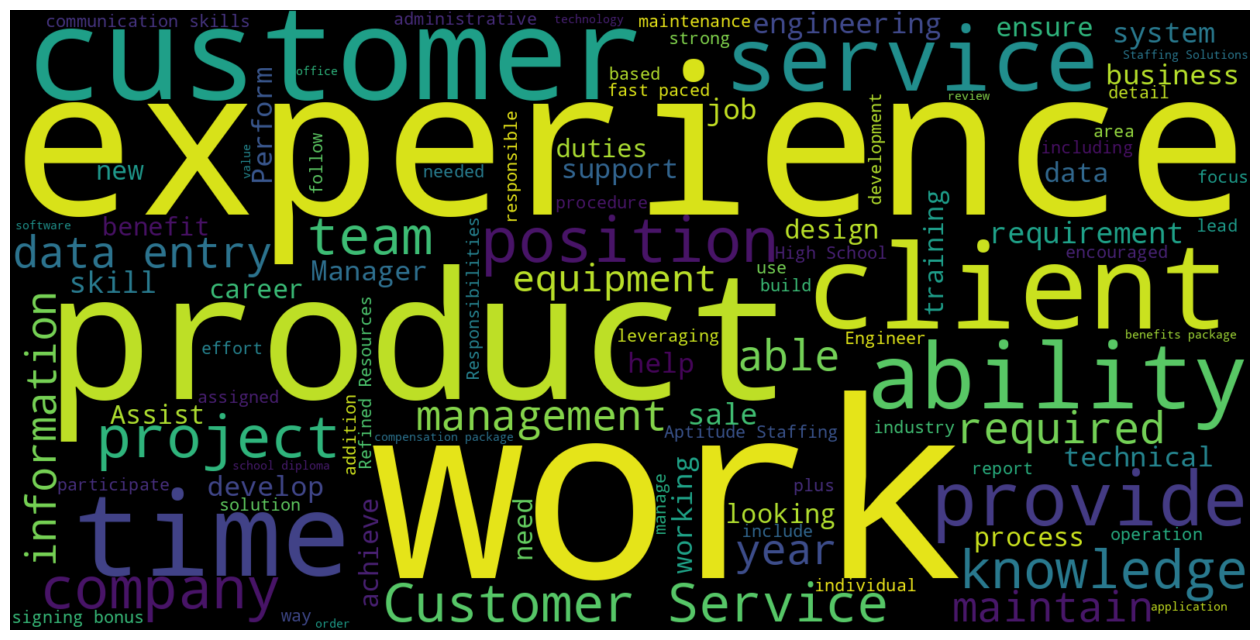

In [90]:
# creating a wordcloud of fraudulent_job_words
plt.figure(figsize=(16, 14))
wc = WordCloud(
    min_font_size=5,
    max_words=100,
    width=1600,
    height=800,
    stopwords=STOP_WORDS,
).generate(fraudulent_job_words)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

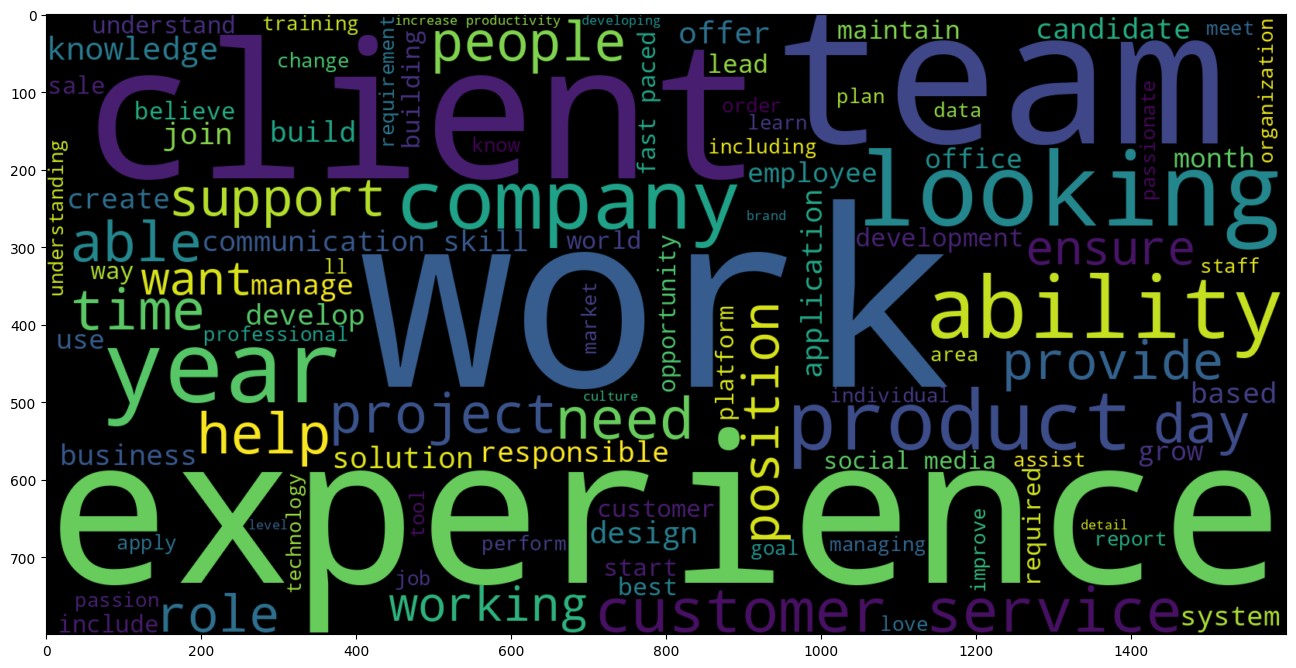

In [91]:
# doing the same for non-fraudulent job posts
non_fraudulent_job_words = ' '.join(df[df['fraudulent'] == 0]['combined'])

# Create and display the word cloud
plt.figure(figsize=(16, 14))
wc = WordCloud(
    min_font_size=5,
    max_words=100,
    width=1600,
    height=800,
    stopwords=STOP_WORDS,
).generate(non_fraudulent_job_words)

plt.imshow(wc, interpolation='bilinear')

plt.show()


### **Text Preprocessing:**
for cleaning and preparing the data for machine learning

In [92]:
# Tokenization and handling stop words
nlp = spacy.load('en_core_web_sm')
punctuation = string.punctuation
stop_words = STOP_WORDS

# creating tokenizer that takes in a sentence and tokenizes, lemmatizes i.e., converts words like running->run, removes punctuations, stopwords, pronouns etc
def spacy_tokenizer(sentence):
    doc = nlp(sentence)
    tokens = [
        token.lemma_.lower().strip()
        for token in doc
        if token.lemma_ != "-PRON-" and
           token.text not in stop_words and
           token.text not in punctuation and
           token.is_alpha
    ]
    return tokens

def clean_text(text):
    return text.strip().lower()

# The class i.e., the transformer takes in the messy text and provide a more useful version of it
class Predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

In [93]:
# calling clean_text on combined
df['combined']=df['combined'].apply(clean_text)

In [94]:
# using a tool called TF-IDF Vectorizer, which turns sentences into a bag of meaningful numbers
cv = TfidfVectorizer(max_features=100)
x = cv.fit_transform(df['combined'])

df_tfidf = pd.DataFrame(x.toarray(), columns=cv.get_feature_names_out())

df.drop(columns=['combined'], inplace=True)
df = pd.concat([df_tfidf, df.reset_index(drop=True)], axis=1)

In [95]:
df.head()

,ability,about,all,amp,an,and,are,as,at,based,...,who,will,with,work,working,world,years,you,your,fraudulent
0,0.022785,0.000000,0.018073,0.000000,0.091187,0.694040,0.000000,0.030540,0.036108,0.000000,...,0.02299,0.048990,0.075249,0.044981,0.000000,0.101390,0.018655,0.051718,0.060471,0
1,0.000000,0.000000,0.065427,0.040634,0.027510,0.605710,0.082181,0.110560,0.000000,0.000000,...,0.00000,0.000000,0.158911,0.027140,0.036887,0.000000,0.033768,0.031205,0.109460,0
2,0.000000,0.113136,0.000000,0.098865,0.000000,0.491242,0.066651,0.033625,0.000000,0.000000,...,0.00000,0.000000,0.110469,0.000000,0.044874,0.223265,0.000000,0.000000,0.221935,0
3,0.000000,0.000000,0.086059,0.053448,0.036185,0.560656,0.000000,0.109069,0.000000,0.052950,...,0.00000,0.077761,0.029861,0.107098,0.000000,0.060351,0.044417,0.000000,0.000000,0
4,0.295486,0.000000,0.039062,0.048521,0.000000,0.428602,0.032710,0.000000,0.019511,0.144204,...,0.00000,0.035296,0.189753,0.226855,0.088091,0.000000,0.120966,0.037261,0.087136,0


In [96]:
# Distributing training and testing labels
y=df['fraudulent']
X=df.drop(columns=['fraudulent'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6808, 100)
(1703, 100)
(6808,)
(1703,)


## **Intermediate Task 03**


Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9808

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1608
           1       0.90      0.67      0.77        95

    accuracy                           0.98      1703
   macro avg       0.94      0.83      0.88      1703
weighted avg       0.98      0.98      0.98      1703

Confusion Matrix:
 [[1601    7]
 [  31   64]]


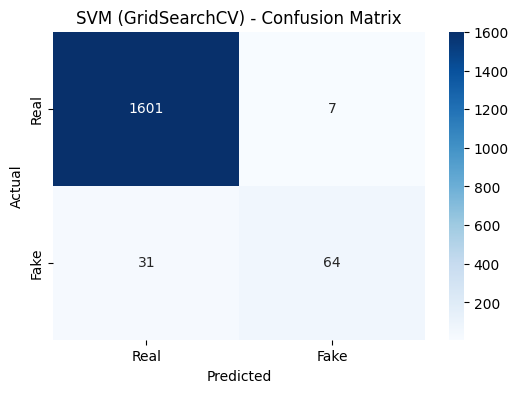

Test Accuracy: 0.9777


In [102]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Creating parameter grid for SVM
param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"]
}

# Applying cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up GridSearchCV for better results for SVM classifier (SVC)
grid = GridSearchCV(SVC(), param_grid, cv=cv_strategy, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Listing Best estimator and parameters
print(f"\nBest Parameters: {grid.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid.best_score_:.4f}")

# Using model to predict
model = grid.best_estimator_
y_pred = model.predict(X_test)

# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.title("SVM (GridSearchCV) - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")